<a href="https://colab.research.google.com/github/bghadge/Computer-Vision/blob/master/01_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EECS 504 PS1: Filtering





# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [0]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images

# Download the images 
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

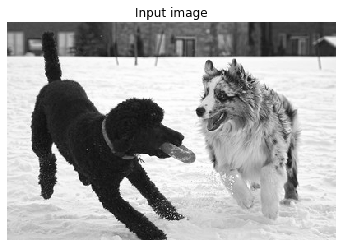

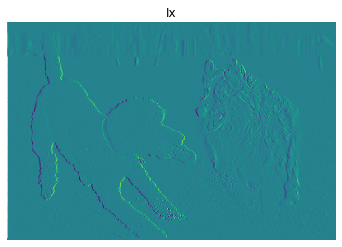

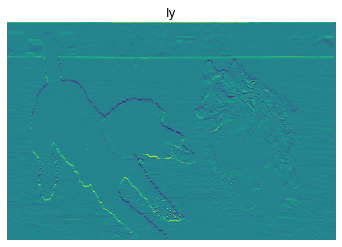

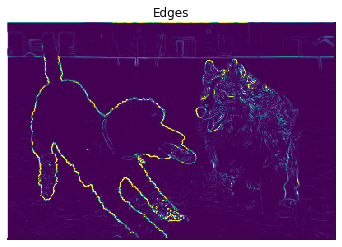

In [0]:
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

dx = np.array([[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]])
dy = np.array([[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]])

def convolve(im,h):
    #flip kernel
    v_kernel = np.flipud(h)
    new_kernel = np.fliplr(v_kernel)
    new_kernel_row , new_kernel_col = new_kernel.shape
    
    #pad image
    im_row,im_col = im.shape
    if new_kernel_row == new_kernel_col and new_kernel_row%2 != 0:
        #odd square matrix padding
        pad_row = int(new_kernel_col - ((new_kernel_col+1)/2))
        pad_col = int(new_kernel_col - ((new_kernel_col+1)/2))
        im_pad = np.pad(im,((pad_row,pad_row),(pad_col,pad_col)), 'constant')
    else:
        #even square matrix and rectangular matrix
        pad_row = int(new_kernel_row-1)
        pad_col = int(new_kernel_col-1)
        im_pad = np.pad(im,((0,pad_row),(0,pad_col)),'constant')
        
    #convolution
    I = np.zeros(im.shape)
    for i in range(0, I.shape[0]-pad_row-1):
        for j in range(0,I.shape[1]-pad_col-1):
            ROI = np.array(im_pad[i:i+new_kernel_row, j:j+new_kernel_col],dtype=float)
            I[i,j] = np.sum(np.multiply(ROI, new_kernel))
    return I

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2 + Iy**2

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

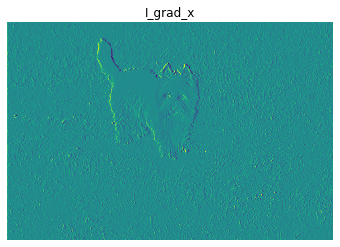

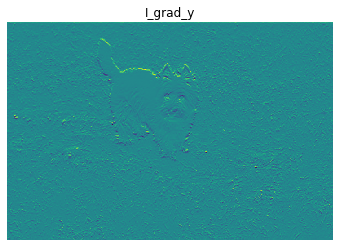

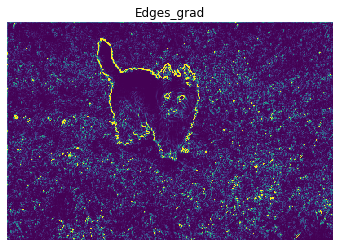

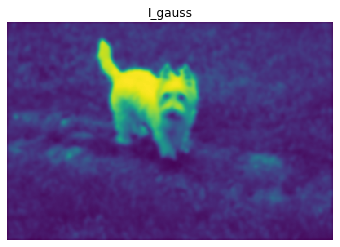

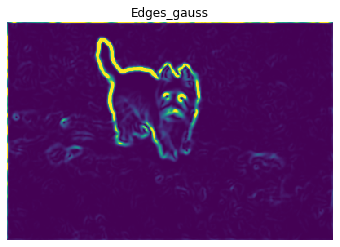

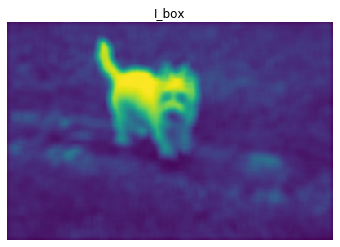

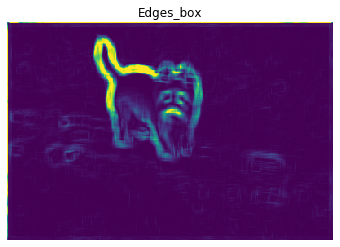

In [0]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# use gradient filter only and visualize the edges
I_grad_x = scipy.ndimage.convolve(im, [[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]], mode = 'constant', cval = 0.0)
I_grad_y = scipy.ndimage.convolve(im, [[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]], mode = 'constant', cval = 0.0)
edges_grad = I_grad_x**2 + I_grad_y**2

plt.figure()
plt.axis('off')
plt.title('I_grad_x')
plt.imshow(I_grad_x)

plt.figure()
plt.axis('off')
plt.title('I_grad_y')
plt.imshow(I_grad_y)


plt.figure()
plt.title('Edges_grad')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges_grad, vmin = 0., vmax = np.percentile(edges_grad, 99))

# blurred image gausiian filter sigma=2 and 11x11 filter
gauss_filter = [[0.000086, 0.00026, 0.000614, 0.001132, 0.001634, 0.001847, 0.001634, 0.001132, 0.000614, 0.00026, 0.000086],
                [0.00026, 0.000784, 0.001848, 0.003408, 0.00492, 0.005561, 0.00492, 0.003408, 0.001848, 0.000784, 0.00026],
                [0.000614, 0.001848, 0.004354, 0.00803, 0.011594, 0.013104, 0.011594, 0.00803, 0.004354, 0.001848, 0.000614],
                [0.001132, 0.003408, 0.00803, 0.014812, 0.021385, 0.02417, 0.021385, 0.014812, 0.00803, 0.003408, 0.001132],
                [0.001634, 0.00492, 0.011594, 0.021385, 0.030875, 0.034896, 0.030875, 0.021385, 0.011594, 0.00492, 0.001634],
                [0.001847, 0.005561, 0.013104, 0.02417, 0.034896, 0.03944, 0.034896, 0.02417, 0.013104, 0.005561, 0.001847],
                [0.001634, 0.00492, 0.011594, 0.021385, 0.030875, 0.034896, 0.030875, 0.021385, 0.011594, 0.00492, 0.001634],
                [0.001132, 0.003408, 0.00803, 0.014812, 0.021385, 0.02417, 0.021385, 0.014812, 0.00803, 0.003408, 0.001132],
                [0.000614, 0.001848, 0.004354, 0.00803, 0.011594, 0.013104, 0.011594, 0.00803, 0.004354, 0.001848, 0.000614],
                [0.00026, 0.000784, 0.001848, 0.003408, 0.00492, 0.005561, 0.00492, 0.003408, 0.001848, 0.000784, 0.00026],
                [0.000086, 0.00026, 0.000614, 0.001132, 0.001634, 0.001847, 0.001634, 0.001132, 0.000614, 0.00026, 0.000086]]
I_gauss = scipy.ndimage.convolve(im, gauss_filter, mode = 'constant', cval = 0.0)

I_gauss_x = scipy.ndimage.convolve(I_gauss, [[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]], mode = 'constant', cval = 0.0)
I_gauss_y = scipy.ndimage.convolve(I_gauss, [[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]], mode = 'constant', cval = 0.0)
edges_gauss = I_gauss_x**2 + I_gauss_y**2

plt.figure()
plt.axis('off')
plt.title('I_gauss')
plt.imshow(I_gauss)

plt.figure()
plt.title('Edges_gauss')
plt.axis('off')
# visualize edge responses using the range of values.
plt.imshow(edges_gauss, vmin = 0., vmax = np.percentile(edges_gauss, 99))

# blur using box filter each value 1/121
box_filter = 1/121*np.ones((11,11))

I_box = scipy.ndimage.convolve(im, box_filter, mode = 'constant', cval = 0.0)

I_box_x = scipy.ndimage.convolve(I_box, [[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]], mode = 'constant', cval = 0.0)
I_box_y = scipy.ndimage.convolve(I_box, [[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]], mode = 'constant', cval = 0.0)
edges_box = I_box_x**2 + I_box_y**2

plt.figure()
plt.axis('off')
plt.title('I_box')
plt.imshow(I_box)

plt.figure()
plt.title('Edges_box')
plt.axis('off')
# visualize edge responses using the range of values.
plt.imshow(edges_box, vmin = 0., vmax = np.percentile(edges_box, 99))


# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

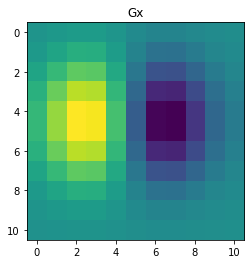

In [0]:
filter_x = scipy.ndimage.convolve(gauss_filter, [[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]], mode = 'constant', cval = 0.0)
filter_y = scipy.ndimage.convolve(gauss_filter, [[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]], mode = 'constant', cval = 0.0)

#Gx = scipy.ndimage.convolve(im, filter_x, mode = 'constant', cval = 0.0)
#Gy = scipy.ndimage.convolve(im, filter_y, mode = 'constant', cval = 0.0)

plt.figure()
plt.title('Gx')
plt.imshow(filter_x)

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

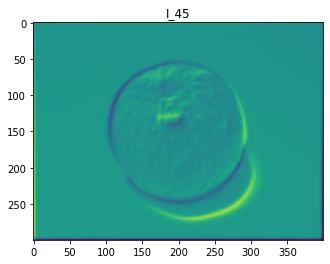

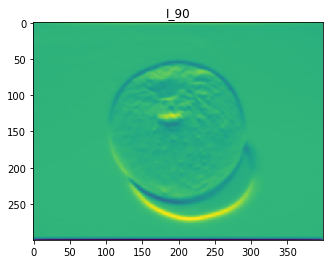

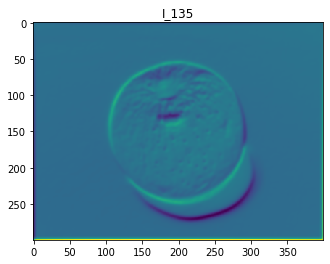

In [0]:
im = imageio.imread('apple.jpg').mean(2)/255.

filter_x = scipy.ndimage.convolve(gauss_filter, [[0.,0.,0.],[0.,1.,-1.],[0.,0.,0.]], mode = 'constant', cval = 0.0)
filter_y = scipy.ndimage.convolve(gauss_filter, [[0.,0.,0.],[0.,1.,0.],[0.,-1.,0]], mode = 'constant', cval = 0.0)

I_x = scipy.ndimage.convolve(im, filter_x, mode = 'constant', cval = 0.0)
I_y = scipy.ndimage.convolve(im, filter_y, mode = 'constant', cval = 0.0)

def oriented_grad(I_x, I_y, theta):
    return np.cos(theta)*I_x + np.sin(theta)*I_y

I_45 = oriented_grad(I_x, I_y, (np.pi/4.))
I_90 = oriented_grad(I_x, I_y, (np.pi/2.)) 
I_135 = oriented_grad(I_x, I_y, (np.pi/0.75)) 

plt.figure()
plt.title('I_45')
plt.imshow(I_45)

plt.figure()
plt.title('I_90')
plt.imshow(I_90)

plt.figure()
plt.title('I_135')
plt.imshow(I_135)